In [1]:
%matplotlib inline
import random
import torch
from torch.distributions.multinomial import Multinomial
from d2l import torch as d2l

### A Simple Example: Tossing Coins

In [2]:
num_tosses = 100
heads = sum([random.random() > 0.5 for _ in range(num_tosses)])
tails = num_tosses - heads
print("heads, tails: ", [heads, tails])

heads, tails:  [52, 48]


In [3]:
fair_probs = torch.tensor([0.5, 0.5])
Multinomial(100, fair_probs).sample()

tensor([49., 51.])

In [4]:
rnd_sample = Multinomial(100, fair_probs).sample()
rnd_sample, rnd_sample / 100

(tensor([52., 48.]), tensor([0.5200, 0.4800]))

In [5]:
counts = Multinomial(10000, fair_probs).sample()
counts, counts / 10000

(tensor([5047., 4953.]), tensor([0.5047, 0.4953]))

counts: tensor([[0., 1.],
        [1., 0.],
        [1., 0.],
        ...,
        [1., 0.],
        [1., 0.],
        [1., 0.]])
cum_counts: tensor([[0.0000e+00, 1.0000e+00],
        [1.0000e+00, 1.0000e+00],
        [2.0000e+00, 1.0000e+00],
        ...,
        [5.0010e+03, 4.9970e+03],
        [5.0020e+03, 4.9970e+03],
        [5.0030e+03, 4.9970e+03]])
estimates: [[0.         1.        ]
 [0.5        0.5       ]
 [0.6666667  0.33333334]
 ...
 [0.50020003 0.49979997]
 [0.50025004 0.49975   ]
 [0.5003     0.4997    ]]


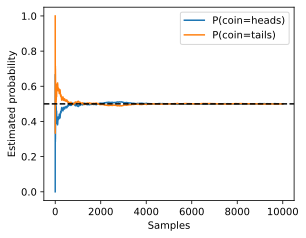

In [9]:
counts = Multinomial(1, fair_probs).sample((10000,))
print("counts:", counts)
cum_counts = counts.cumsum(dim=0)
print('cum_counts:', cum_counts)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)
estimates = estimates.numpy()
print('estimates:', estimates)

d2l.set_figsize((4.5, 3.5))
d2l.plt.plot(estimates[:, 0], label=("P(coin=heads)"))
d2l.plt.plot(estimates[:, 1], label=("P(coin=tails)"))
d2l.plt.axhline(y=0.5, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Samples')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend();

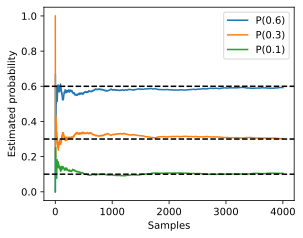

In [34]:
nfair_probs = torch.tensor([0.6, 0.3, 0.1])
nfair_counts = Multinomial(1, nfair_probs).sample((4000,))
nfair_cum_counts = nfair_counts.cumsum(dim=0)
nfair_estimates = nfair_cum_counts / nfair_cum_counts.sum(dim=1, keepdims=True)
nfair_estimates = nfair_estimates.numpy()

d2l.set_figsize((4.5, 3.5))
d2l.plt.plot(nfair_estimates[:, 0], label=("P(0.6)"))
d2l.plt.plot(nfair_estimates[:, 1], label=("P(0.3)"))
d2l.plt.plot(nfair_estimates[:, 2], label=("P(0.1)"))
d2l.plt.axhline(y=0.6, color='black', linestyle='dashed')
d2l.plt.axhline(y=0.3, color='black', linestyle='dashed')
d2l.plt.axhline(y=0.1, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Samples')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend();

### Exercises

In [48]:
coin_probs = torch.tensor([0.5, 0.5])
throws_10 = Multinomial(10, fair_probs).sample((100,))
throws_1000 = Multinomial(1000, fair_probs).sample((100,))
throws_10, throws_1000 = throws_10 / 10, throws_1000 / 1000
heads_10, heads_1000 = throws_10[:, 0], throws_1000[:, 0]

print("Ten throws variance:", torch.var(heads_10))
print("Thousand throws variance:", torch.var(heads_1000))

Ten throws variance: tensor(0.0270)
Thousand throws variance: tensor(0.0003)


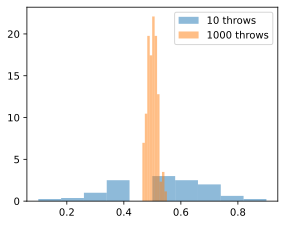

In [53]:
import matplotlib.pyplot as plt
plt.hist(heads_10.numpy(), alpha=0.5, label='10 throws', density=True)
plt.hist(heads_1000.numpy(), alpha=0.5, label='1000 throws', density=True)
plt.legend()
plt.show()

In [75]:
for i in [100, 1000, 10000, 100000]:
    a = torch.randn(1, i)
    print(f"{i} mean:", torch.mean(a))
    print(f"{i} var:", torch.var(a), '\n')

100 mean: tensor(0.0419)
100 var: tensor(1.2125) 

1000 mean: tensor(0.0297)
1000 var: tensor(0.9969) 

10000 mean: tensor(0.0006)
10000 var: tensor(0.9905) 

100000 mean: tensor(-0.0013)
100000 var: tensor(0.9947) 



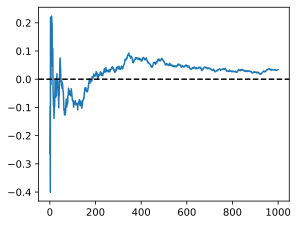

In [87]:
import matplotlib.pyplot as plt

x = torch.randn(1000) 
sums = torch.cumsum(x, dim=0) 
m = torch.arange(1, 1001) 
z_m = sums / m 

plt.plot(z_m)
plt.axhline(y=0, color='black', linestyle='--')
plt.show()